In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
42,787 cases (7 day average) as of Tue 20 Jul, -1,043.4 since Mon 19 Jul
702 hospitalised (7 day average) as of Wed 21 Jul, +0.0 since Wed 21 Jul
44 died (7 day average) as of Tue 20 Jul, +1.7 since Mon 19 Jul


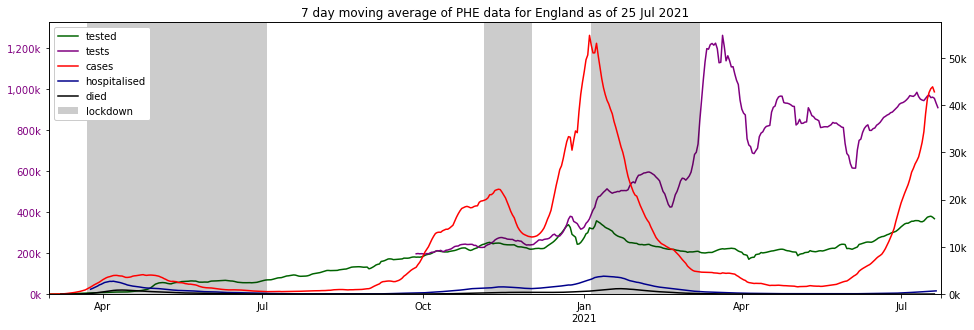

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

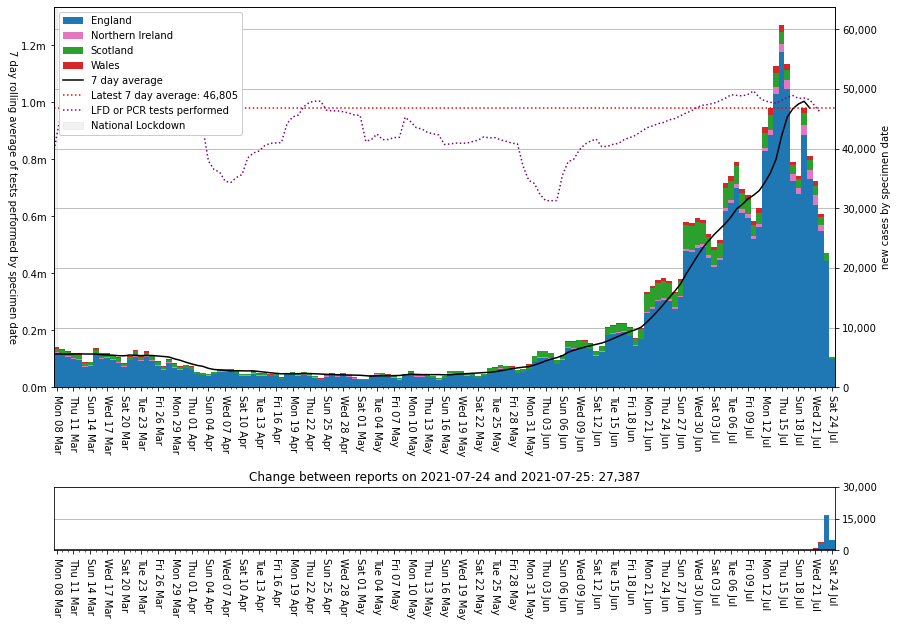

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

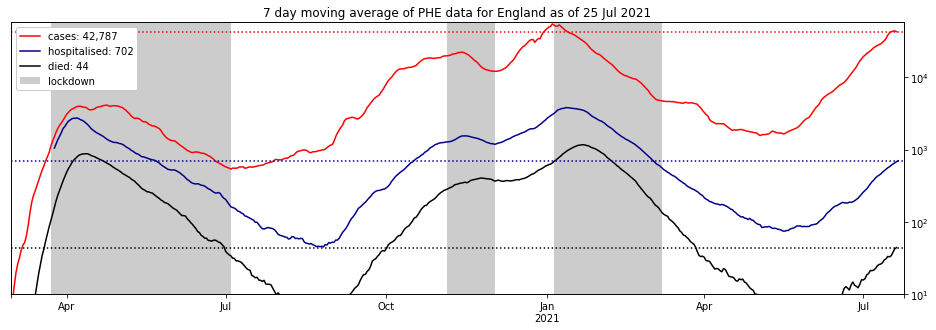

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

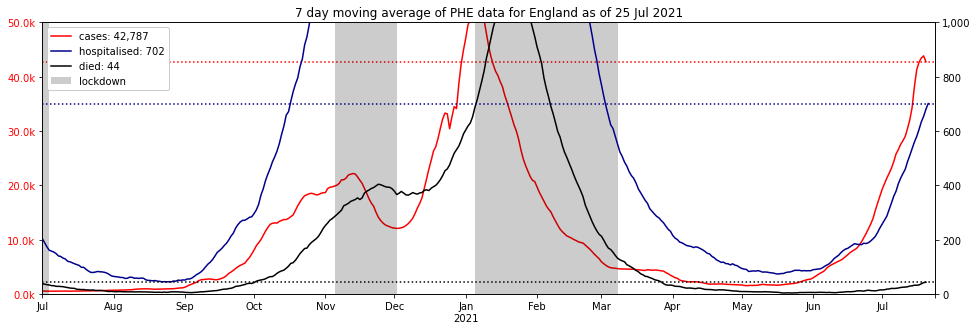

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=1000)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,24 Jul 21,"+31,087,214","+39,084,065","+31,087,214","+177,885","+38,958","+177,885"
Northern Ireland,24 Jul 21,"+1,008,906","+1,195,271","+1,008,906","+2,181","+1,417","+2,181"
Scotland,24 Jul 21,"+3,079,492","+3,997,105","+3,079,492","+15,051","+2,222","+15,051"
Wales,24 Jul 21,"+1,985,047","+2,287,011","+1,985,047","+11,851",+857,"+11,851"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,31087214.0,39084065.0,7996851.0,56286961,55.229868,14.207289,30.562844
1,Northern Ireland,N92000002,1008906.0,1195271.0,186365.0,1893667,53.277899,9.841487,36.880613
2,Scotland,S92000003,3079492.0,3997105.0,917613.0,5463300,56.366884,16.795948,26.837168
3,Wales,W92000004,1985047.0,2287011.0,301964.0,3152879,62.959822,9.577405,27.462773


'partial: 46,563,452 (69.7%), full: 37,160,659'

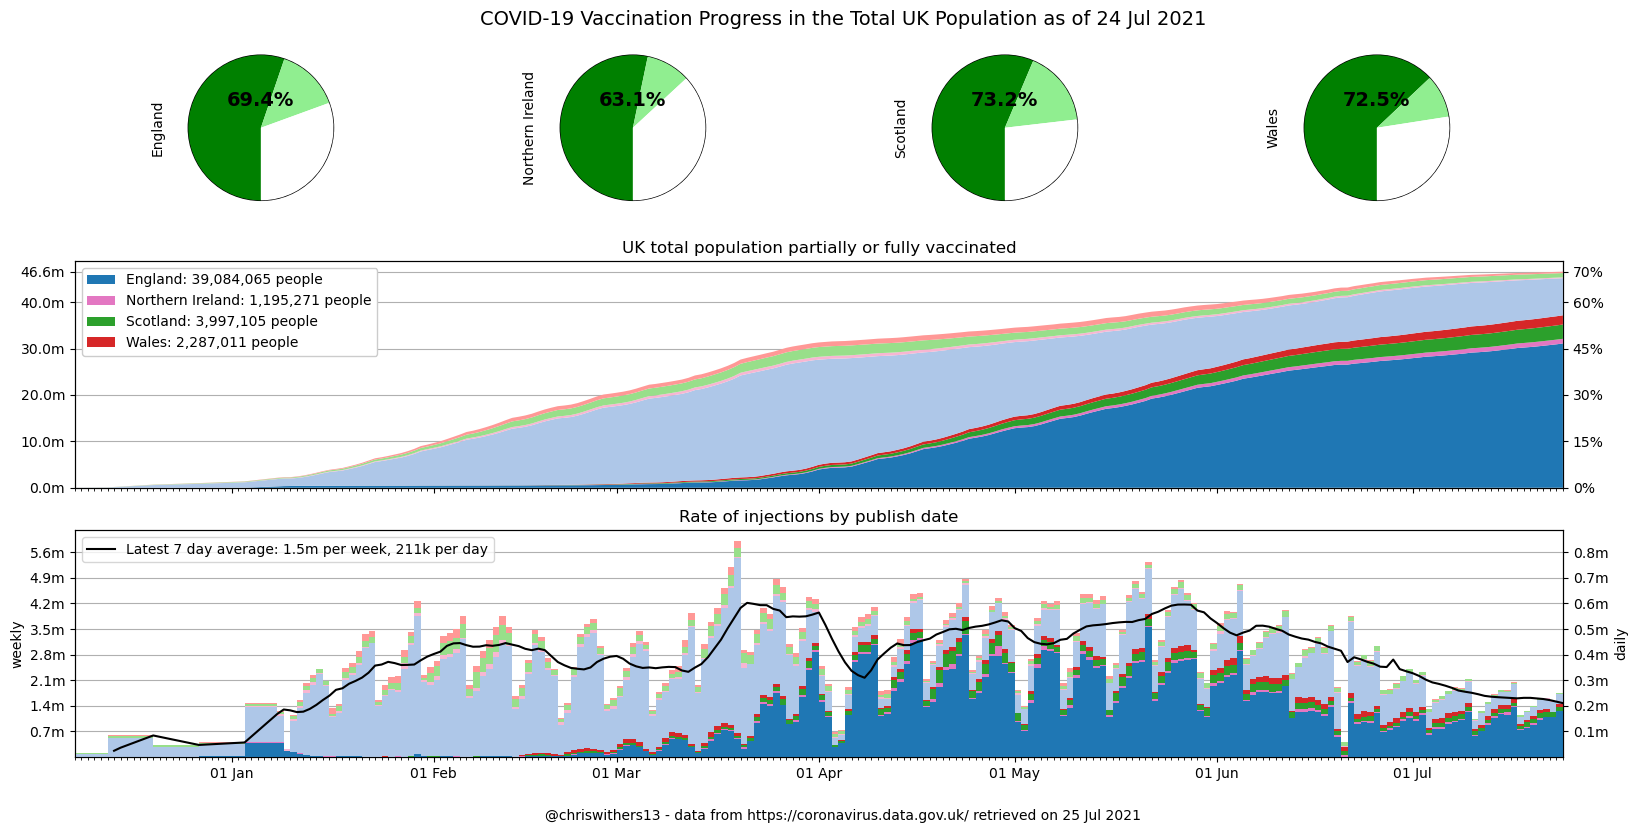

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

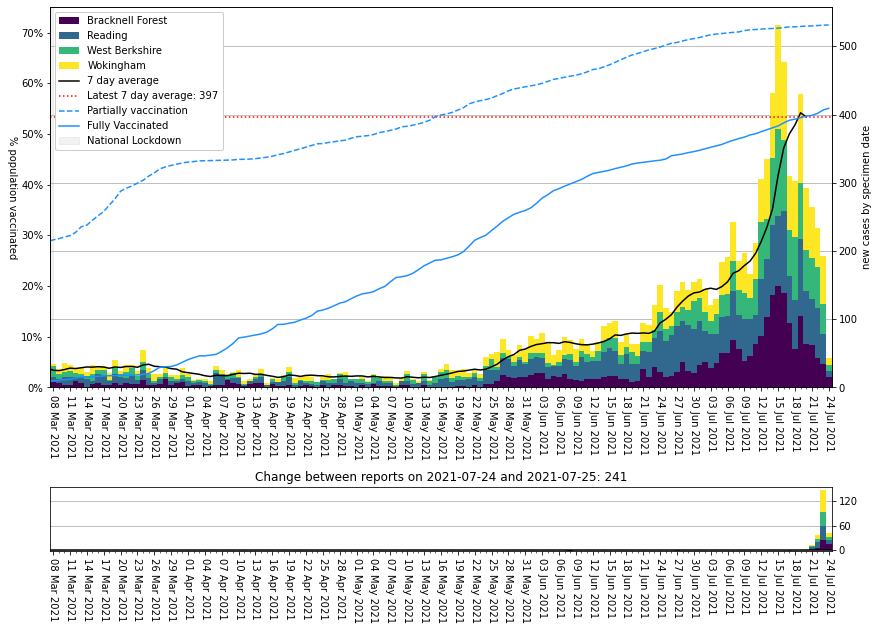

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

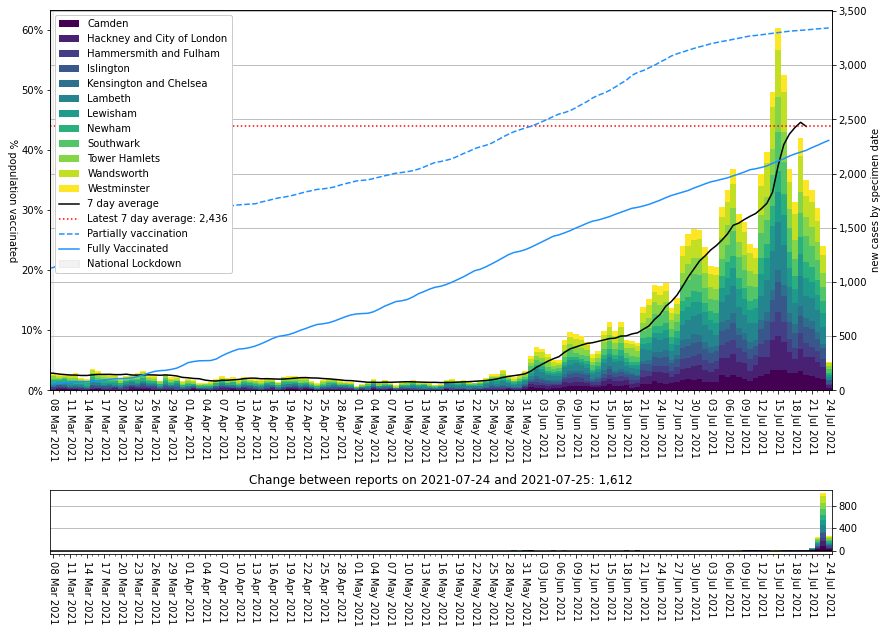

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000003,Redcar and Cleveland,795.479402,1091.0,2021-07-24
E06000002,Middlesbrough,786.636402,1109.0,2021-07-24
E06000004,Stockton-on-Tees,702.819385,1387.0,2021-07-24
E06000012,North East Lincolnshire,636.739094,1016.0,2021-07-24
E06000001,Hartlepool,596.820516,559.0,2021-07-24
E08000023,South Tyneside,592.809453,895.0,2021-07-24
E06000009,Blackpool,580.152891,809.0,2021-07-24
E06000005,Darlington,574.890218,614.0,2021-07-24
E07000029,Copeland,569.056803,388.0,2021-07-24


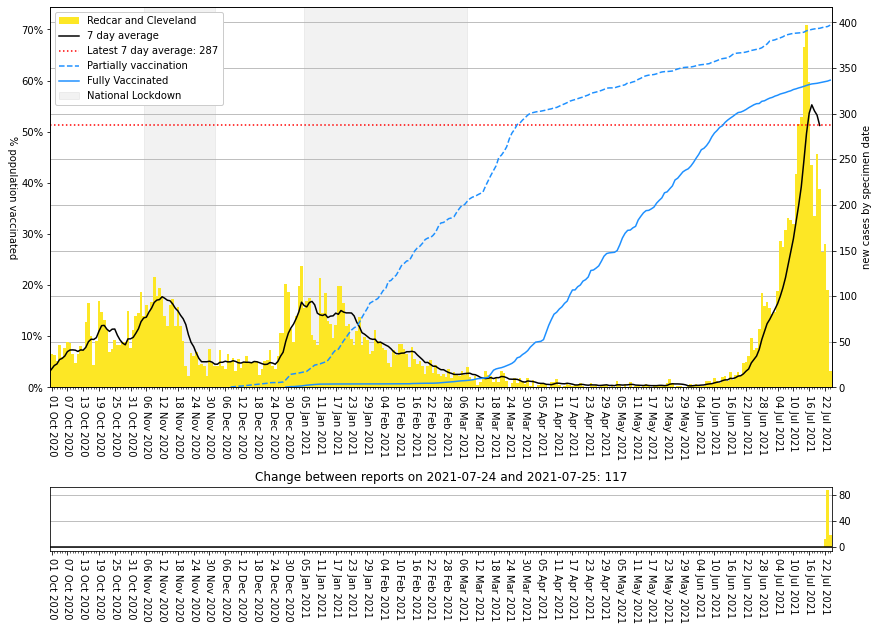

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,346.991109,3962.0,2021-07-24
E08000035,Leeds,405.981801,3220.0,2021-07-24
E06000047,County Durham,455.579576,2415.0,2021-07-24
E06000023,"Bristol, City of",496.356099,2300.0,2021-07-24
E08000032,Bradford,423.879535,2288.0,2021-07-24
E08000019,Sheffield,389.328601,2277.0,2021-07-24
E08000003,Manchester,358.138980,1980.0,2021-07-24
N09000003,Belfast,565.287505,1942.0,2021-07-24
E08000017,Doncaster,566.866523,1768.0,2021-07-24


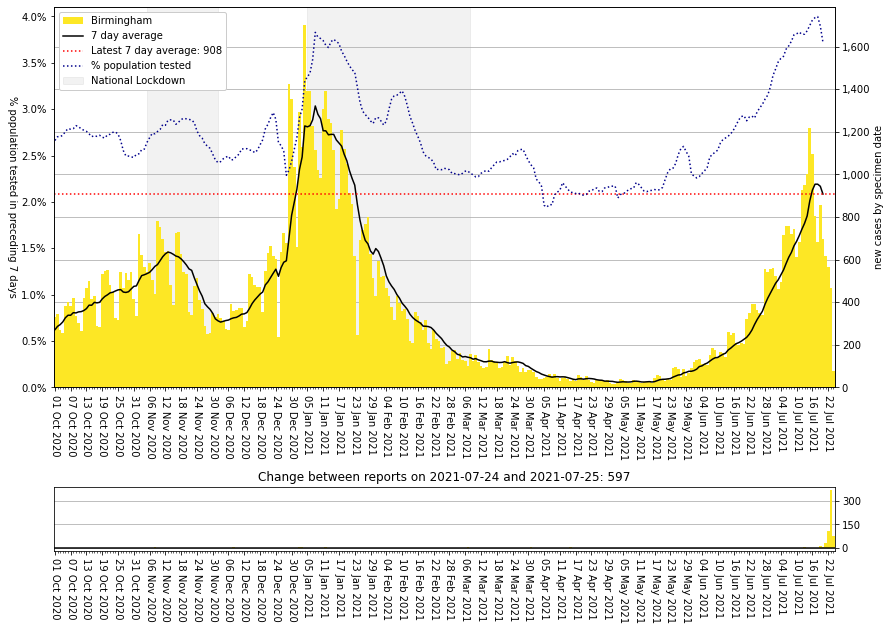

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

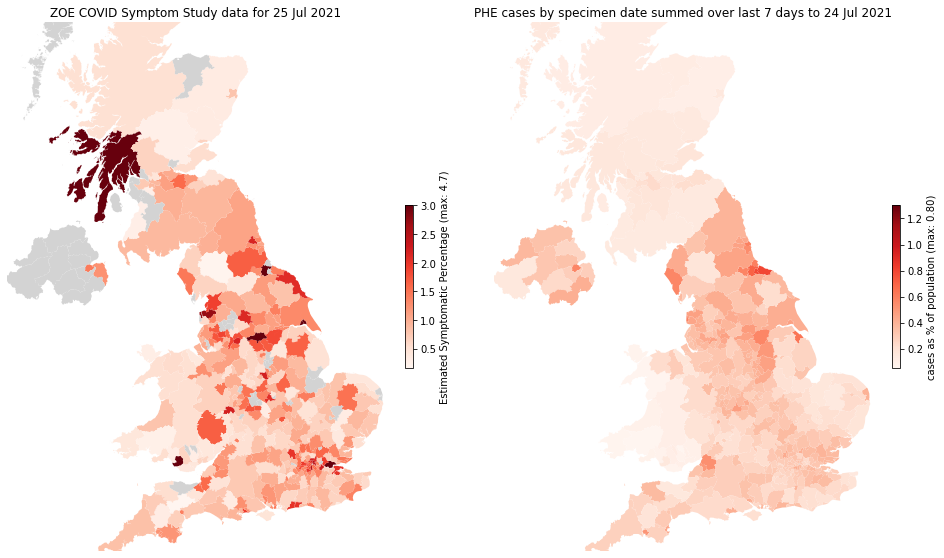

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...